In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import torch
import torch.nn as nn
import torch.nn.functional as F

from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
import random
from sklearn.utils import shuffle
from torch.autograd import Variable
torch.set_default_tensor_type('torch.FloatTensor')

In [2]:
#X,y = datasets.make_circles(n_samples=200,random_state=21,noise=0.2,factor=0.5)
X,y = datasets.make_moons(n_samples=200,random_state=121,noise=0.1)
#X,y = datasets.make_classification(200,2,n_redundant=0, n_informative=1,
#                           random_state=20, n_clusters_per_class=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)

Text(0, 0.5, 'feature 2')

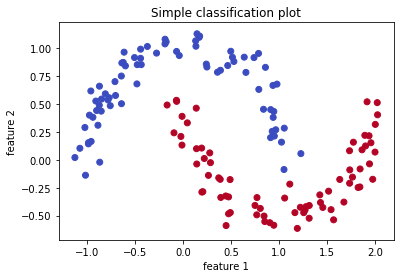

In [3]:
fig, ax = plt.subplots()
ax.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=plt.cm.coolwarm)
ax.set_title('Simple classification plot')
plt.xlabel("feature 1")
plt.ylabel("feature 2")

In [4]:
import torch.nn.functional as F
# NN model can be summarized as: ***INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT***

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 20)
        self.fc2 = nn.Linear(20, 10)
        self.fc3 = nn.Linear(10, 2)
        
    def forward(self, x):
        x = self.fc1(x)
        #x = F.dropout(x, p=0.1)
        x = F.relu(x)
        x = self.fc2(x)
        #x = F.dropout(x, p=0.1)
        x = F.relu(x)
        x = self.fc3(x)
        x = torch.sigmoid(x)
        
        
        return x
    
net = Net()

In [5]:
def plot(model):
    h = 0.1
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    #print(xx.shape)
    # here "model" is your model's prediction (classification) function
    a = Variable(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()])).type('torch.FloatTensor')
    #print(a.shape)
    Z = model(a)[:, 1]
    Z = Z.data.numpy()
    #print(type(z))
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig,ax = plt.subplots()
    plt.contourf(xx, yy, Z,20, cmap=plt.cm.jet)
    plt.axis('off')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    
def epoch_plot(model,epoch,save_img=False):
    h = 0.1
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    #print(xx.shape)
    # here "model" is your model's prediction (classification) function
    a = Variable(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()])).type('torch.FloatTensor')
    #print(a.shape)
    Z = model(a)[:, 1]
    Z = Z.data.numpy()
    #print(type(z))
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig,ax = plt.subplots()
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm)
    plt.title("Epoch: %d"%epoch)
    plt.axis('off')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    if save_img==True:
        fig.savefig('animation/%s.png'%epoch)   # save the figure to file
        plt.close(fig)
def iter_plot(model,epoch,iter,save_img=False,save_nth=1):
    h = 0.1
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    #print(xx.shape)
    # here "model" is your model's prediction (classification) function
    a = Variable(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()])).type('torch.FloatTensor')
    #print(a.shape)
    Z = model(a)[:, 1]
    Z = Z.data.numpy()
    #print(type(z))
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig,ax = plt.subplots()
    plt.contourf(xx, yy, Z,50, cmap=plt.cm.jet)
    
    plt.title("Iter: %s"%(str(epoch)+"_"+str(iter)))
    plt.axis('off')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    if save_img==True and i%2==0 and epoch==0:
        fig.savefig('animation/%s.png'%(str(epoch)+"_"+str(iter)))   # save the figure to file
        plt.close(fig)
    if save_img==True and i%save_nth==0 and epoch>0:
        fig.savefig('animation/%s.png'%(str(epoch)+"_"+str(iter)))   # save the figure to file
        plt.close(fig)
    if save_img==True:
        plt.close(fig)

In [6]:

####
activate_plots=False
save_img = False
save_nth = 35
batch_size = 20
num_epochs = 200
learning_rate = 0.02
batch_no = len(X_train) // batch_size
####
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
####
for epoch in range(num_epochs):
    #if epoch % 5 == 0:
    #    print('Epoch {}'.format(epoch+1))
    X_train, y_train = shuffle(X_train, y_train)
    # Mini batch learning
    for i in range(batch_no):
        optimizer.zero_grad()
        start = i * batch_size
        end = start + batch_size
        x_var = Variable(torch.FloatTensor(X_train[start:end]))
        y_var = Variable(torch.LongTensor(y_train[start:end]))
        # Forward + Backward + Optimize
        
        ypred_var = net(x_var)
        loss = criterion(ypred_var, y_var)
        loss.backward()
        optimizer.step()
        if activate_plots==True:
            iter_plot(net,epoch,i,save_img,save_nth)
    print("iteration:",epoch,"Loss:",loss.item())
    #epoch_plot(net,epoch)
   

iteration: 0 Loss: 0.6259426474571228
iteration: 1 Loss: 0.4856277406215668
iteration: 2 Loss: 0.4391910135746002
iteration: 3 Loss: 0.3881041407585144
iteration: 4 Loss: 0.3678745627403259
iteration: 5 Loss: 0.45548921823501587
iteration: 6 Loss: 0.44239968061447144
iteration: 7 Loss: 0.4202863574028015
iteration: 8 Loss: 0.33560997247695923
iteration: 9 Loss: 0.35927075147628784
iteration: 10 Loss: 0.32016003131866455
iteration: 11 Loss: 0.3425610661506653
iteration: 12 Loss: 0.4290939271450043
iteration: 13 Loss: 0.3463309705257416
iteration: 14 Loss: 0.3893094062805176
iteration: 15 Loss: 0.3202207684516907
iteration: 16 Loss: 0.3366871774196625
iteration: 17 Loss: 0.3325421214103699
iteration: 18 Loss: 0.3242647647857666
iteration: 19 Loss: 0.3198239207267761
iteration: 20 Loss: 0.31687629222869873
iteration: 21 Loss: 0.3245559632778168
iteration: 22 Loss: 0.32188400626182556
iteration: 23 Loss: 0.32338792085647583
iteration: 24 Loss: 0.31452473998069763
iteration: 25 Loss: 0.3240

In [7]:
## # Evaluate the model
test_var = Variable(torch.FloatTensor(X_test), requires_grad=True)
with torch.no_grad():
    result = net(test_var)
values, labels = torch.max(result, 1)
num_right = np.sum(labels.data.numpy() == y_test)
print('Accuracy {:.2f}'.format(num_right / len(y_test)))



Accuracy 1.00


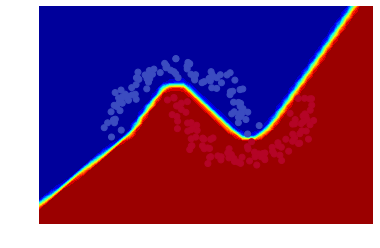

In [8]:
plot(net)